<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Analyze-A/B-Test-Results" data-toc-modified-id="Analyze-A/B-Test-Results-0.1">Analyze A/B Test Results</a></span></li></ul></li><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span><ul class="toc-item"><li><span><a href="#Part-I---Probability" data-toc-modified-id="Part-I---Probability-1.1">Part I - Probability</a></span></li></ul></li><li><span><a href="#ToDo-1.1" data-toc-modified-id="ToDo-1.1-2">ToDo 1.1</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#ToDo-1.2" data-toc-modified-id="ToDo-1.2-2.0.1">ToDo 1.2</a></span></li><li><span><a href="#ToDo-1.3" data-toc-modified-id="ToDo-1.3-2.0.2">ToDo 1.3</a></span></li><li><span><a href="#ToDo-1.4" data-toc-modified-id="ToDo-1.4-2.0.3">ToDo 1.4</a></span></li></ul></li><li><span><a href="#Interpreting-the-results:" data-toc-modified-id="Interpreting-the-results:-2.1">Interpreting the results:</a></span></li><li><span><a href="#Part-II---A/B-Test" data-toc-modified-id="Part-II---A/B-Test-2.2">Part II - A/B Test</a></span><ul class="toc-item"><li><span><a href="#ToDo-2.1" data-toc-modified-id="ToDo-2.1-2.2.1">ToDo 2.1</a></span></li></ul></li><li><span><a href="#Hypothesis:" data-toc-modified-id="Hypothesis:-2.3">Hypothesis:</a></span><ul class="toc-item"><li><span><a href="#ToDo-2.2---Null-Hypothesis-$H_0$-Testing" data-toc-modified-id="ToDo-2.2---Null-Hypothesis-$H_0$-Testing-2.3.1">ToDo 2.2 - Null Hypothesis $H_0$ Testing</a></span></li></ul></li><li><span><a href="#Question--1:-What-is-this-value-called-in-scientific-studies?" data-toc-modified-id="Question--1:-What-is-this-value-called-in-scientific-studies?-2.4">Question  1: What is this value called in scientific studies?</a></span><ul class="toc-item"><li><span><a href="#Interpretation:" data-toc-modified-id="Interpretation:-2.4.1">Interpretation:</a></span></li></ul></li><li><span><a href="#Question-2:-What-does-this-value-signify-in-terms-of-whether-or-not-there-is-a-difference-between-the-new-and-old-pages?" data-toc-modified-id="Question-2:-What-does-this-value-signify-in-terms-of-whether-or-not-there-is-a-difference-between-the-new-and-old-pages?-2.5">Question 2: What does this value signify in terms of whether or not there is a difference between the new and old pages?</a></span><ul class="toc-item"><li><span><a href="#Answer:" data-toc-modified-id="Answer:-2.5.1">Answer:</a></span></li><li><span><a href="#About-the-two-sample-z-test" data-toc-modified-id="About-the-two-sample-z-test-2.5.2">About the two-sample z-test</a></span></li></ul></li><li><span><a href="#Interpretation-of-the-z-test-result:" data-toc-modified-id="Interpretation-of-the-z-test-result:-2.6">Interpretation of the z-test result:</a></span></li><li><span><a href="#Part-III---A-regression-approach" data-toc-modified-id="Part-III---A-regression-approach-2.7">Part III - A regression approach</a></span><ul class="toc-item"><li><span><a href="#ToDo-3.1" data-toc-modified-id="ToDo-3.1-2.7.1">ToDo 3.1</a></span></li></ul></li><li><span><a href="#Interpretation:" data-toc-modified-id="Interpretation:-2.8">Interpretation:</a></span></li><li><span><a href="#Final-Check!" data-toc-modified-id="Final-Check!-2.9">Final Check!</a></span></li><li><span><a href="#Submission" data-toc-modified-id="Submission-2.10">Submission</a></span></li></ul></li></ul></div>

## Analyze A/B Test Results

#This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 


- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
# Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

Each **ToDo** task below has an associated quiz present in the classroom.  Though the classroom quizzes are **not necessary** to complete the project, they help ensure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the [rubric](https://review.udacity.com/#!/rubrics/1214/view) specification. 



<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

# ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

 <center>

 |Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
 |group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
 |landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
#|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
 </center>



 **a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [2]:
# reading in the .csv file
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [3]:
# checking the number of rows in a dataset
df.shape

(294478, 5)

In [4]:
# checking the general values of the dataset
df.describe()

,user_id,converted
count,294478.000000,294478.000000
mean,787974.124733,0.119659
std,91210.823776,0.324563
min,630000.000000,0.000000
25%,709032.250000,0.000000
50%,787933.500000,0.000000
75%,866911.750000,0.000000
max,945999.000000,1.000000


**c.** The number of unique users in the dataset.

In [5]:
# checking the number of unique users in the dataset
df.groupby('converted')['user_id'].nunique()

converted
0    256275
1     35173
Name: user_id, dtype: int64

In [6]:
# checking the number of unique users in the dataset with only one command
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

**d.** The proportion of users converted.

In [7]:
# Geting the proportion of users converted.
(df.converted == 1).mean()

0.11965919355605512

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [8]:
# Geting the number of times when the "group" is treatment but "landing_page" is not a new_page
df.query("group == 'treatment' and landing_page != 'new_page'").count()[0]

1965

**f.** Do any of the rows have missing values?

In [9]:
# checking if rows have missing values
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [10]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
df2 = df.drop(df.query('group == "control" & landing_page != "old_page"').index)
df2 = df2.drop(df.query('group == "treatment" & landing_page != "new_page"').index)

In [11]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### ToDo 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [12]:
# checking number of unique users in df2
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [13]:
# checking for duplicate user ID in df2
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**c.** Display the rows for the duplicate **user_id**? 

In [14]:
# creating and displaying a mask for display of the user_id's for duplicates
dupl_userids = df2.user_id.duplicated(keep=False)
print(df2[dupl_userids])

      user_id                   timestamp      group landing_page  converted
1899   773192  2017-01-09 05:37:58.781806  treatment     new_page          0
2893   773192  2017-01-14 02:55:59.590927  treatment     new_page          0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [15]:
# Removing one of the rows with a duplicate user_id
df2.drop_duplicates(['user_id'],inplace = True)
# Check again if the row with a duplicate user_id is deleted or not
df2[df2['user_id'].duplicated()]

,user_id,timestamp,group,landing_page,converted


### ToDo 1.4  
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>


In [16]:
# probability that the individual converting regardless of the page they receive
P_conv = df2.query('converted == "1"').user_id.nunique()/df2.shape[0]
P_conv

0.11959708724499628

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
# Given that an individual was in the control group, what is the probability they converted

P_conv_contr = df2.query('group == "control"')
P_conv_contr.converted.mean()

0.1203863045004612

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
# given that an individual was in the treatment group, what is the probability they converted
P_conv_treatm = df2.query('group == "treatment"')
P_conv_treatm.converted.mean()

0.11880806551510564

In [19]:
# the actual difference (obs_diff) between the conversion rates for the two groups
obs_diff = P_conv_treatm.converted.mean() - P_conv_contr.converted.mean()
obs_diff

-0.0015782389853555567

**d.** What is the probability that an individual received the new page?

In [20]:
# the probability that an individual received the new page
(df2['landing_page'] == 'new_page').mean()

0.50006194422266881

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

## Interpreting the results:

<span style="color:blue"> Considering the results from (a) through (d) above it is clear to see that the treatment group lead not significantly to conversions. We can see that only 1.5% is the difference between treatment and control group conversions, and even the old page visitors conversions are very slightly higher like 1.57%. </span>

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

> Recall that you just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (ToDo 1.4.c). 

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

## Hypothesis: 

<span style="color:blue"> Null Hypothesis is that P old is smaller and or equal compared to P new.
Alternative Hypothesis is that P new is greater than P old. </span>

### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [21]:
# the conversion rate for  P new under the null hypothesis
p_new_null = (df2.converted == 1).mean()
p_new_null

0.11959708724499628

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [22]:
# the conversion rate for  P old under the null hypothesis
p_old_null = (df2.converted == 1).mean()
p_old_null 

0.11959708724499628

**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>

In [23]:
# treatment group users are shown the new page
n_new = df2[df2['group'] == "treatment"].count()[0]
n_new

145310

**d.** What is $n_{old}$, the number of individuals in the control group?

In [24]:
# number of individuals in the control group n old
n_old = df2[df2['group'] == "control"].count()[0]
n_old

145274

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>

In [25]:
# simulating a Sample for the treatment Group
new_page_converted = np.random.choice([0, 1], size=n_new, p=[p_new_null, 1-p_new_null])
new_page_converted

array([0, 0, 1, ..., 1, 1, 1])

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [26]:
# simulating a Sample for the control Group
old_page_converted = np.random.choice([0, 1], size=n_old, p=[p_old_null, 1-p_old_null])
old_page_converted

array([0, 1, 1, ..., 1, 1, 1])

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [27]:
# difference between p_new and o_old (that is the "converted" probability)
new_page_converted.mean() - old_page_converted.mean()

0.0010552703956352438


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [28]:
# sampling distribution 
p_diffs = []
for _i in range(10000):
    new_page_converted = np.random.choice([0, 1], size=n_new, p=[p_new_null, 1-p_new_null]).mean()
    old_page_converted = np.random.choice([0, 1], size=n_old, p=[p_old_null, 1-p_old_null]).mean()
    p_diffs.append(new_page_converted-old_page_converted)


In [29]:
# checking p_diffs - it turns out to be a list - I commented it out as it is taking a lot of place
# print(p_diffs)  


**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  


In [30]:
# changing p_diff from a list to an array 
p_diffs = np.array(p_diffs)

In [31]:
# bevore ploting create distribution for the null hypothesis
null_vals = np.random.normal(0, p_diffs.std(), p_diffs.size)

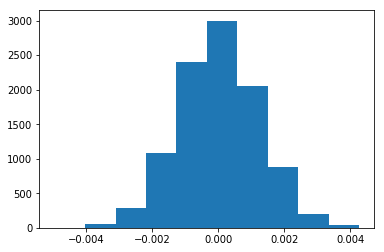

In [32]:
# ploting p_diffs to check if normally distributed as expected
plt.hist(p_diffs);

Text(0,0.5,'Number of observations')

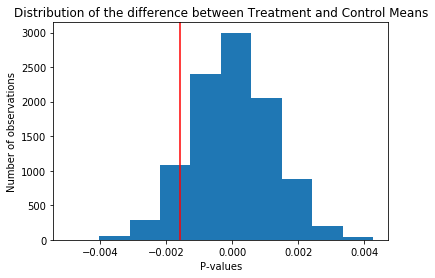

In [33]:
# ploting p_diffs  with labels
plt.hist(p_diffs);
plt.axvline(obs_diff,color='r');
plt.title('Distribution of the difference between Treatment and Control Means')
plt.xlabel('P-values') 
plt.ylabel('Number of observations')

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [34]:
# calculating p_value
p_value = (null_vals > obs_diff).mean()
p_value

0.90110000000000001

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies? 

 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)".

 


## Question  1: What is this value called in scientific studies? 

<span style="color:blue"> I am citating some webpage for theorie (source: https://en.wikipedia.org/wiki/P-value ) 
"Not to be confused with the P-factor.
In null-hypothesis significance testing, **the p-value is the probability of obtaining test results at least as extreme as the result actually observed, under the assumption that the null hypothesis is correct**. A very small p-value means that such an extreme observed outcome would be very unlikely under the null hypothesis. Reporting p-values of statistical tests is common practice in academic publications of many quantitative fields. Since the precise meaning of p-value is hard to grasp, misuse is widespread and has been a major topic in metascience."</span>

### Interpretation:
<span style="color:blue"> By applying Hypothesis testing for statistical significance, the P-value is the conditional probability of the data given that the null hypothesis is true. We use it practically to examine if we can reject the Null Hypothesis or not. </span>
 
## Question 2: What does this value signify in terms of whether or not there is a difference between the new and old pages? 

### Answer:  
<span style="color:blue"> This signifies as the P value is 0.9 that the Null Hypothesis won't be rejected; 0.05 indicates a 5% error rate 'allowance'. In this case it means that the treatment group conversions are either statistically nor practically significantly proven higher than the control group conversions. Therefore the Null Hypothesis can not be rejected.  </span>




**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [35]:
# preparation steps of the data for z-test

import statsmodels.api as sm

# number of conversions with the old_page
convert_old = sum((df2.group == 'control')&(df2.converted == 1))

# number of conversions with the new_page
convert_new = sum((df2.group == 'treatment')&(df2.converted == 1))

# number of individuals who were shown the old_page
n_old = sum(df2.group == 'control')

# number of individuals who received new_page
n_new = sum(df2.group == 'treatment')

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 

The built-in function above will return the z_score, p_value. 

---
### About the two-sample z-test
Recall that you have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $(p{'}_{new}-p{'}_{old})$  for your two simulated samples 10,000 times. 

Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


>Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 

Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values: 
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests,  and 1.960 for two-tailed test. You can determine the $Z_{\alpha}$ from the z-table manually. 

Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the  null based on the comparison between $Z_{score}$ and $Z_{\alpha}$. We determine whether or not the $Z_{score}$ lies in the "rejection region" in the distribution. In other words, a "rejection region" is an interval where the null hypothesis is rejected iff the $Z_{score}$ lies in that region.

>Hint:<br>
For a right-tailed test, reject null if $Z_{score}$ > $Z_{\alpha}$. <br>
For a left-tailed test, reject null if $Z_{score}$ < $Z_{\alpha}$. 




Reference: 
- Example 9.1.2 on this [page](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(Shafer_and_Zhang)/09%3A_Two-Sample_Problems/9.01%3A_Comparison_of_Two_Population_Means-_Large_Independent_Samples), courtesy www.stats.libretexts.org

---


In [36]:
# performing z-test
import statsmodels.api as sm
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old],alternative='larger')
print(z_score, p_value)

-1.31092419842 0.905058312759


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>



## Interpretation of the z-test result:

<span style="color:blue"> I understand this as the p-value is 0.905 and this indicates, the Null Hypothesis can not be rejected. And this is a one (left) tailed test; as Z score is smaller than Z alpha with a z-score value of -1.31 so below under Z 0.05 (5% error 'allovance')1.645 and below the Null. Summary: the Null Hypothesis can not be rejected. </span>


<a id='regression'></a>
## Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

<span style="color:blue"> I will be using logistic regression </span>

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [37]:
# seting intercept and geting dummies for the test in next step
df2['intercept'] = 1
df2[['ab_page', 'oldpage']] = pd.get_dummies(df2['landing_page'])
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,oldpage
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [38]:
# performing logictis regression 
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logit_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-11-21 04:40 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [39]:
1/np.exp(-0.015)

1.0151130646157189

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  

**Hints**: 
- What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**? 
- You may comment on if these hypothesis (Part II vs. Part III) are one-sided or two-sided. 
- You may also compare the current p-value with the Type I error rate (0.05).


## Interpretation:

<span style="color:blue"> as this is a logistic regression the **Hypothesis** is like:</span>

<span style="color:blue"> **Null Hypothesis**: is the P old = than P new, which means here that being in a treatment or a conversion group does not affect the conversion rate.
**Alternative Hypothesis**: is the P old ≠ than P new, which means here that being in a treatment or a conversion group does affect the conversion rate. </span>

<span style="color:blue"> The result shows that being in a treatment or conversion group does not affects the conversion rate. Becasue the P value is 0.189 so ab_page is not significant for the conversion rate, so we fail to reject the Null hypothesis. </span>

<span style="color:blue"> My understanding is that this is a two sided hypothesis under given alpha 0.05 (5% error rate 'allovance'). </span>

**f.** Now, you are considering other things that might influence whether or not an individual converts. Discuss why it is a good idea to consider other factors to add into your regression model. Are there any disadvantages to adding additional terms into your regression model?
Put your answer here.



<span style="color:blue"> I think there is a kinf of effective level / number for variables to use for data analyses. It might depend on a kind of data, the kind of question we are helping to answer with our analysis. However, I would think that adding to many variables can create either misleading analysis. </span>

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 
>**Hint:** Use `pandas.get_dummies()` to create dummy variables. **You will utilize two columns for the three dummy variables.** 

 Provide the statistical output as well as a written response to answer this question.

In [40]:
# read in the file countries.csv
country_df = pd.read_csv('countries.csv')
country_df.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [41]:
# join with the df2 dataframe
df3 = country_df.set_index('user_id').join(df2.set_index('user_id'), how='inner') 
df3.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,oldpage
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0


In [42]:
# create the necessary dummy variables
dummies1_df = pd.get_dummies(df3['country'])
df4 = df3.join(dummies1_df)
df4.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,oldpage,CA,UK,US
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,0,1,0


In [43]:
# checking how many datas are in new dataframe

df4.shape

(290584, 11)

**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 

>**Tip**: Conclusions should include both statistical reasoning, and practical reasoning for the situation. 

>**Hints**: 
- Look at all of p-values in the summary, and compare against the Type I error rate (0.05). 
- Can you reject/fail to reject the null hypotheses (regression model)?
- Comment on the effect of page and country to predict the conversion.


In [44]:
# instantiating logistic regression model
df4['intercept']=1
df4['US_ab_page'] = df4['US']*df4['ab_page']
df4['UK_ab_page'] = df4['UK']*df4['ab_page']
df4['CA_ab_page'] = df4['CA']*df4['ab_page']
log_m = sm.Logit(df4['converted'], df4[['intercept', 'ab_page', 'US', 'UK', 'US_ab_page', 'UK_ab_page']])
results = log_m.fit()
results.summary2()


Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2022-11-21 04:40 AIC:              212782.6602
No. Observations:   290584           BIC:              212846.1381
Df Model:           5                Log-Likelihood:   -1.0639e+05
Df Residuals:       290578           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0040    0.0364  -55.0077  0.0000  -2.0754  -1.9326
ab_page       -0.0674    0.0520   -1.2967  0.1947  -0.1694   0.0345
US             0.0175    0.0377    0.4652  0.6418  -0.0563   0.0914
UK             0.0118    0.0398    0.2957  0.7674  -0.0663   0.0899
US_ab_page     0.0469    0.0538    0.8718  0.3833  -0.0585   0.1523
UK_ab_page     0.0783    0.0568    1.3783  0.1681  -0.0330   0.1896
==================================================================

"""

<span style="color:blue"> After adding countries and performing logistic regression again, even considering the countries the P values are tough either low, we cannot reject the Null Hypothesis. Which is: conversion rate of treatment and control group is the same. I was analysing the given three different countries, and from all three countries CA, US, UK the
US turned out as the highest level of relation (P value is 0.64) with conversion rates, what I interpret like in US the highest number of people compared to another countries like CA and UK been receiving a new page. Even doing higher order analysis between US and UK and conversion rates, the P-values are still kind of low; we can not reject the Null Hypothesis under the given Type I error rate of alpha of 0.005 (5 % Error rate 'allovance'). </span>

    
<span style="color:blue">  The final conclusion is that under given the three different type of analysises: </span>

<span style="color:blue">  1.) Hypothesis Tests: Testing the difference in means</span>

<span style="color:blue">  2.) Two sample z-test: testing the difference between population proportions</span>

<span style="color:blue">  3.) Performing logistic regression on the original datas and with the additionally joined countries datas </span>
    
<span style="color:blue">  **we can say that there is either statistical nor practical significance that we can reject the Null, under the given alpha or Type I error rate of alpha of 0.005 (5 % Error rate 'allovance'). In that case it is recommended to keep the old version of the page and not switch to the new version of page.**
</span>


<a id='finalcheck'></a>
## Final Check!

Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your notebook to make sure that it satisfies all the specifications mentioned in the rubric. You should also probably remove all of the "Hints" and "Tips" like this one so that the presentation is as polished as possible.


<a id='submission'></a>
## Submission
You may either submit your notebook through the "SUBMIT PROJECT" button at the bottom of this workspace, or you may work from your local machine and submit on  the last page of this project lesson.  

1. Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).


2. Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.


3. Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])